# Project 2 Starter

## Summary

Project 2 is to facilitate students practice of the following Data Science concepts:
- Train and tune classification model
- Perform feature engineering to improve model performance
- Explain/interpret and debug model


## Tasks

The project will include following tasks:
- Load dataset. Don't use "index" column for training.
- Clean up the data:
    - Encode replace missing values
    - Replace features values that appear incorrect
    - Encode numerical variables that come as strings, for example string `$100.01` should be converted to numerical value
- Encode categorical variables
- Split dataset to Train/Test/Validation. If you perform cross-validation while tuning hyper-parameters, you don't need validation dataset.
- Add engineered features. Simple encoding (Target encoding) for individual feature doesn't count to the 10 required engineered features
- Train and tune ML models
- Provide final metrics using Test (hold-out) dataset:
    - Classification: AUC
    - Confusion matrix for best F1
- Interpret final trained model using Test dataset:
    - Global feature importance using both Shapley values and permutation feature importance
    - Summary plot with Shapley values 
    - Individual observations analysis using Shapley values. Two records for each of the scenarios with significant probability:
        - Label `0` is correctly identified
        - Label `0` is identified as `1`
        - Label `1` is correctly identified
        - Label `1` is identified as `0`
        - Significant probability means high probability of being correct/in-correct (depending on the scenario)

## Datasets

You are provided with the  dataset on eLearning. 
There were several changes made to the dataset: columns dropped/added. 

The dataset is from the U.S. Small Business Administration (SBA) The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market (SBA Overview and History, US Small Business Administration (2015)). Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment. There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans.  
More info on the original dataset: https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied



**Don't use original datasets, use only dataset provided with project requirements in eLearning**

## Deliverables in a single zip file in the following structure:
- `notebook` (folder)
    - Jupyter notebook with complete code to manipulate data, train and tune final model. `ipynb` format
    - Jupyter notebook in `html` format
- `artifacts` (folder)
    - Model and any potential encoders in the "pkl" format or native H2O-3 format (for H2O-3 model)
    - Scoring function that will load the final model and encoders. Separate from above notebook or `.py` file

**Additional requirements:**
- Each cell in the notebook should have been run
- Use markdown to annotate and explain your code
- Use visualizations for ML explainability part


Your notebook should include explanations about your code and be designed to be easily followed. All results should be reproducible. Every cell with code should be run.

Once you are done with final version, you will need to test it by running all cells from top to bottom after restarting Kernel. It can be done by running `Kernel -> Restart & Run All`


**Important**: you might want to first produce working code using small subset of the dataset to speed up debugging process.

## Models

You will need to train and tune two types of models:
- GBM (H2O)
- LightGBM. To install LightGBM, run following command from your terminal after activating class virtual environment:  `pip install lightgbm==3.3.5` 


You will train and tune 2 models for each task for the total of 2 final models. 


First, split he dataset to Train/Validation/Test, before applying any encodings clean-up or feature engineering. 
It is important to understand all the steps before model training, so that you can reliably replicate and test them to produce scoring function.


### Categorical variables encoding

Encode categorical variables using either one of the techniques below. Don't use LabelEncoder.
- One-hot-encoder for variables with less than 10 valid values. Name your new columns "Original_name"_valid_value
- (If using sklearn) Target encoder from the following library: https://contrib.scikit-learn.org/category_encoders/index.html . Name your new column "Original_name"_trg
- (If using H2O) Use H2O target encoder


Example of use for target encoder:
```
import category_encoders as ce

encoder = ce.TargetEncoder(cols=[...])

encoder.fit(X, y)
X_cleaned = encoder.transform(X_dirty)
```

### Feature engineering

You should train/fit categorical features encoders on Train only. Use `transform` or equivalent function on Validation/Test datasets.

It is important to understand all the steps before model training, so that you can reliably replicate and test them to produce scoring function.


You should generate various new features. Examples of such features can be seen in the Module-3 lecture on GLMs.
Your final model should have at least **10** new engineered features. One-hot-encoding, label encoding, and target encoding is not included in the **10** features.

Ideas for Feature engineering for various types of variables:
1. https://docs.h2o.ai/driverless-ai/1-10-lts/docs/userguide/transformations.html
2. GLM lecture and hands-on (Module-3)

### Model Tuning

Perform hyper parameter tuning for both models.
- Hyper-parameter tuning. Your hyper-parameter search space should have at least 150 combinations or 150 Optuna trials.
- To avoid over-fitting and provide you with reasonable estimate of model performance on hold-out dataset, you will need to split your dataset as following:
    - Train, will be used to train model
    - Validation, will be used to validate model each round of training. Not needed if you perform cross-validation.
    - Testing, will be used to provide final performance metrics, used only once on the final model
- Feature engineering. You should add at least two engineered features.  For example, add feature which is combination of two features.
- Calculate probability threshold to maximize F1.

It should be clearly stated what parameters were selected after hyper parameters tuning. If using early stopping, make sure final model is trained with proper parameters that include number of iterations.

To simplify scoring, train single model on provided full dataset with parameters and features found in the Tuning stage.

## Scoring Function

You only need to submit single scoring function for either GBM or LightGBM model.
The scoring function will perform the following activities:
- Accept dataset in the same format as provided with the project, minus "target" column
- Load trained model and any encoders that are needed to transform data
- Transform dataset into format that can be scored with the trained model
- Score the dataset and return the results, for each record in a similar way as in Project 1:
    - Record label as determined by final model
    - You need to assign label based on maximum F1 threshold
    - Probability 

```
index	label	probability_0	probability_1
1	      0	        0.901298	0.098702
2	      1	        0.071879	0.928121
3	      1	        0.367665	0.632335
4	      1	        0.098564	0.901436
5	      0	        0.923460	0.076540
```

See Project 1 for more details on scoring function and working example.

### Threshold calculation

You will need to calculate optimal threshold for class assignment using F1 metric:
- If using sklearn, use F1 `macro`: `f1_score(y_true, y_pred, average='macro')` 
- If using H2O-3, use F1

You will need to find optimal probability threshold for class assignment, the threshold that maximizes above F1.


### Model interpretation

You should provide detailed write-up on what features are important for the model predictions. Your write-up should be written in "english" and in the way business manager can understand how the model works.
At the minimum include:
- Shapley summary graph: `shap.plots.beeswarm` 
- Shapley feature interaction graphs: `shap.plots.scatter` 
- Multiple examples of single records Shapley graphs with explanations. 
- Strong/Weak points of the model
- Are there any scenarios (particular input data) that will require over-write model prediction? 

Resources: https://github.com/slundberg/shap


### Model performance in H2O Driverless AI (performance to aim for)

I run experiments in DAI without any data manipulation. It means that potential improvement in performance can be gained after data is cleaned. 
AUC on cross-validation dataset: 0.8515
AUC on hold-out (not provided, will be evaluated on during grading): 0.855

Three top features:
- CVTE:Bank:BankState:FranchiseCode:SBA_Appv.0
- CVTE:Bank:BankState:NAICS:UrbanRural.0
- WoE:Bank:BankState:NAICS.0


CVTE: cross-validated target encoding
WoE : weight of evidence 

## Save all artifacts

Save all artifacts needed for scoring function:
- Trained model
- Encoders

You should restart your Kernel to properly test scoring function

## Model Scoring

Use example scoring function from Project 1 as the reference. 


## Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install category_encoders
!pip install h2o
!pip install lightgbm==3.3.5
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 1500)

# import warnings
# warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Encoders
from category_encoders import TargetEncoder

In [ ]:
# h2o intialization
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,55 mins 13 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_unknownUser_fi42je
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.157 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# h2o modules
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

In [ ]:
# sklearn modules
from sklearn.metrics import f1_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
# lightgbm modules
import lightgbm as lgb

## Load Data example

In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/Course Work/aml2/project2/SBA_loans_project_2(1).zip")

In [ ]:
data.head()

,index,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LoanInd,MIS_Status
0,0,PRINCETON,MN,55371,PEOPLES BANK OF COMMERCE,MN,441120,4,2.0,0,0,1,0,N,N,"$114,577.00",$0.00,"$114,577.00","$85,933.00",1,0
1,1,Kansas city,MO,64116,BANK OF HAYS,KS,481111,14,1.0,0,14,0,1,N,N,"$25,000.00",$0.00,"$25,000.00","$12,500.00",7,0
2,2,BELLWOOD,PA,16617,FIRST COMMONWEALTH BANK,PA,334417,10,1.0,0,2,1,1,0,N,"$85,000.00",$0.00,"$85,000.00","$42,500.00",4,0
3,3,GRAND PRAIRIE,TX,75050,PROSPERITY BANK,TX,0,18,1.0,0,0,1,0,N,N,"$230,000.00",$0.00,"$230,000.00","$195,500.00",5,0
4,4,EL PASO,TX,79925,WESTSTAR BANK,TX,423220,4,1.0,0,4,0,1,N,N,"$32,000.00",$0.00,"$32,000.00","$16,000.00",9,0


In [ ]:
(data['MIS_Status'].value_counts()) / len(data) * 100

0    82.438293
1    17.561707
Name: MIS_Status, dtype: float64

## Dataset preparation and clean-up

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807450 entries, 0 to 807449
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              807450 non-null  int64  
 1   City               807424 non-null  object 
 2   State              807437 non-null  object 
 3   Zip                807450 non-null  int64  
 4   Bank               806103 non-null  object 
 5   BankState          806097 non-null  object 
 6   NAICS              807450 non-null  int64  
 7   NoEmp              807450 non-null  int64  
 8   NewExist           807328 non-null  float64
 9   CreateJob          807450 non-null  int64  
 10  RetainedJob        807450 non-null  int64  
 11  FranchiseCode      807450 non-null  int64  
 12  UrbanRural         807450 non-null  int64  
 13  RevLineCr          803360 non-null  object 
 14  LowDoc             805159 non-null  object 
 15  DisbursementGross  807450 non-null  object 
 16  Ba

In [ ]:
data.isna().sum()

index                   0
City                   26
State                  13
Zip                     0
Bank                 1347
BankState            1353
NAICS                   0
NoEmp                   0
NewExist              122
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4090
LowDoc               2291
DisbursementGross       0
BalanceGross            0
GrAppv                  0
SBA_Appv                0
LoanInd                 0
MIS_Status              0
dtype: int64

### Imputing missing values

In [ ]:
# numerical column
data['NewExist'].fillna(method='ffill', inplace=True)

In [ ]:
# categorical columns
data[['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc']] = \
    data[['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc']].fillna(value="Missing")

### Clean-up the string columns

In [ ]:
# converting string style to float style

str_cols = ['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']

data[str_cols] = data[str_cols].apply(lambda x: x.str.replace('$', '').str.replace(',', '').astype(float))

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


### Dropping unwanted columns

Columns with many levels

In [ ]:
# dropping unwanted columns
data.drop(axis=1, columns=['index'], inplace=True)

### One hot encoding

Applying it to columns only with levels <= 10

In [ ]:
obj_cols = data.select_dtypes('object').columns
for col in obj_cols:
    print(col, ":", data[col].nunique())

City : 31283
State : 52
Bank : 5724
BankState : 57
RevLineCr : 19
LowDoc : 9


In [ ]:
# onehot encoding on 'LowDoc' column
data = pd.get_dummies(data, columns=['LowDoc'], prefix='LowDoc', drop_first=True)

### Train test split

In [ ]:
# splitting the dataset into train and test 80-20

# shuffling 
data = data.sample(frac=1).reset_index(drop=True)

# splitting
train = data.head(int(len(data) * 0.8))
test = data.tail(len(data) - len(train))

### Target encoding

In [ ]:
# categorical columns
cat_cols = data.select_dtypes('object').columns.to_list()

# creating an instance of target encoder
encoder = TargetEncoder()

# fitting on the training data
encoder.fit(X=train[cat_cols],
            y=train['MIS_Status'])

TargetEncoder(cols=['City', 'State', 'Bank', 'BankState', 'RevLineCr'])

In [ ]:
# tranforming train and test dataset
train_te = encoder.transform(train[cat_cols])
test_te = encoder.transform(test[cat_cols])

# renaming the columns
train_te.columns = train_te.columns.map(lambda x: x + '_te')
test_te.columns = test_te.columns.map(lambda x: x + '_te')

# concating with the orginal dataset and dropping the duplicate columns
train = pd.concat([train.drop(cat_cols, axis=1), train_te], axis=1)
test = pd.concat([test.drop(cat_cols, axis=1), test_te], axis=1)

In [ ]:
import pickle

with open('/content/drive/MyDrive/Course Work/aml2/project2/encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

### Feature Engineering

In [ ]:
# function to create interaction terms in the dataset

def add_features(data, inter_ls):
    interactions = [(feat1, feat2) for feat1 in inter_ls 
                    for feat2 in inter_ls if feat1 != feat2]
    
    for feat1, feat2 in interactions:
        col_name = feat1 + '_x_' + feat2
        data[col_name] = data[feat1] * data[feat2]
                
    return data

In [ ]:
# adding interaction terms to the dataset

inter_cols = ['NoEmp', 'CreateJob', 'RetainedJob', 'FranchiseCode']

train = add_features(train, inter_cols)
test = add_features(test, inter_cols)

### Model Training - H2OGBM

In [ ]:
# converting pd.DataFrame to h2o frame
train_h2o = h2o.H2OFrame(train)
test_h2o = h2o.H2OFrame(test)

# Defining predictors and response columns
predictors = train_h2o.columns
response = 'MIS_Status'
predictors.remove(response)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# defining hyperparameter search space
hyper_params = {
    'ntrees': [50, 100, 150],
    'max_depth': [3, 7, 11, 15],
    'learn_rate': [0.07, 0.1, 0.13],
    'sample_rate': [0.6, 0.7, 0.8, 0.9]
}

# creating a model instance
gbm_model = H2OGradientBoostingEstimator(distribution='quasibinomial', 
                                         seed=1)

# creating grid search instance
grid1 = H2OGridSearch(
    model = gbm_model,
    hyper_params = hyper_params,
    grid_id = "gbm_grid"
)

# training
grid1.train(x=predictors, 
           y=response, 
           training_frame=train_h2o, 
           nfolds=5)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,learn_rate,max_depth,ntrees,sample_rate,model_ids,logloss
,0.1,7.0,150.0,0.9,gbm_grid_model_35,0.3504793
,0.1,7.0,150.0,0.8,gbm_grid_model_23,0.3505651
,0.13,7.0,150.0,0.8,gbm_grid_model_24,0.3515516
,0.07,7.0,150.0,0.8,gbm_grid_model_22,0.3515617
,0.13,7.0,150.0,0.9,gbm_grid_model_36,0.3517891
,0.07,7.0,150.0,0.9,gbm_grid_model_34,0.3519237
,0.1,7.0,100.0,0.9,gbm_grid_model_29,0.3519742
,0.1,7.0,150.0,0.7,gbm_grid_model_11,0.3520626
,0.13,7.0,100.0,0.8,gbm_grid_model_18,0.3524187
,0.1,7.0,100.0,0.8,gbm_grid_model_17,0.3524300


In [ ]:
res = grid1.get_grid(sort_by='F1', decreasing=True)
best_model = res.models[0]

In [ ]:
# getting the predicted probability of class 1
prob_1 = best_model.predict(test_h2o)["p1"]

# converting h2oFrame to list
prob_1 = prob_1.as_data_frame().values.tolist()
true_y = test["MIS_Status"].values.tolist()

# getting results from ROC curve
fpr, tpr, thresholds = roc_curve(true_y, prob_1)

# Calculate index for the best probability threshold
best_f1 = 0
best_f1_id = 0
for id, threshold in enumerate(thresholds):
    f1 = f1_score(prob_1 >= threshold, true_y)
    if f1 > best_f1:
        best_f1 = f1
        best_f1_id = id

# getting the best
best_threshold_h2o = thresholds[best_f1_id]
best_threshold_h2o

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


0.2404868085473892

In [ ]:
# Save the trained model
best_model.save_mojo("/content/drive/MyDrive/Course Work/aml2/project2/model.zip")

'/content/drive/MyDrive/Course Work/aml2/project2/model.zip/gbm_grid_model_35.zip'

### Model Training - LightGBM

In [ ]:
# train test split
data_reduced = pd.concat([train, test])

# splitting
X_train, X_test, y_train, y_test = train_test_split(data_reduced.drop('MIS_Status', axis=1), 
                                                    data_reduced['MIS_Status'], 
                                                    test_size=0.2, 
                                                    random_state=16)

# creating LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

In [ ]:
# grid params
param_grid = {
    'num_leaves': [25, 50, 75, 100],
    'learning_rate': [0.05, 0.1, 0.15, 0.2],
    'feature_fraction': [0.6, 0.7, 0.8, 0.9],
    'max_depth': [7, 10, 15]
}

# Define the LightGBM model with fixed hyperparameters
lgb_model = lgb.LGBMClassifier(objective='binary', metric='binary_logloss')

# Perform grid search with cross-validation
grid_search = GridSearchCV(lgb_model, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy')

# fitting
grid_search.fit(X_train, y_train)

In [ ]:
# Print the best parameters and their corresponding score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best parameters: {'feature_fraction': 0.9, 'learning_rate': 0.05, 'max_depth': -1, 'num_leaves': 100}
Best score: 0.8560000000000001


In [ ]:
# Train the model with the best hyperparameters on the full training set
best_params = grid_search.best_params_
gbm = lgb.train(best_params, train_data, num_boost_round=100)

# Make predictions on the testing set
y_pred = gbm.predict(X_test)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

# Evaluate model performance
f1_sc = f1_score(y_test, y_pred)
print('F1 score:', f1_sc)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5681
[LightGBM] [Info] Number of data points in the train set: 96000, number of used features: 35
[LightGBM] [Info] Start training from score 0.174969
F1 score: 0.43286770747740344


In [ ]:
# getting the predicted probability of class 1
prob_1 = list(gbm.predict(X_test))

# converting to list
true_y = y_test.values.tolist()

# getting results from ROC curve
fpr, tpr, thresholds = roc_curve(true_y, prob_1)

# Calculate index for the best probability threshold
best_f1 = 0
best_f1_id = 0
for id, threshold in enumerate(thresholds):
    f1 = f1_score(prob_1 >= threshold, true_y)
    if f1 > best_f1:
        best_f1 = f1
        best_f1_id = id

# getting the best
best_threshold_lgbm = thresholds[best_f1_id]
best_threshold_lgbm

0.25710352353835975

### Model interpretation

In [ ]:
model = h2o.import_mojo("/content/drive/MyDrive/Course Work/aml2/project2/model.zip")

generic Model Build progress: |██████████████████████████████████████████████████| (done) 100%


In [ ]:
# The function is to calculate Shapley values (contributions) and plot them for multiple records
def examine_all_reason_codes(data, model):
    
    shap_contribs = model.predict_contributions(data)
    
    col_mapping = {}
    for i in data.col_names: 
        related_cols = [x for x in shap_contribs.col_names if "{}.".format(i) in x]
        if len(related_cols) > 0:
            col_mapping[i] = related_cols
            
    for k, v in col_mapping.items():
        if len(v) > 1:
            shap_contribs[k] = shap_contribs[v].sum(axis=1,return_frame=True)
            shap_contribs = shap_contribs.drop(v)
        
    shap_cols = [i for i in shap_contribs.col_names if i != "BiasTerm"]
    bias_term = shap_contribs.as_data_frame()["BiasTerm"].values
    X = data.as_data_frame(use_pandas=True)
    shap_contribs = shap_contribs.as_data_frame(use_pandas=True)
    
    return shap.summary_plot(shap_contribs[shap_cols].values, 
                             X[shap_cols].values,
                             feature_names=shap_cols
                            )

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


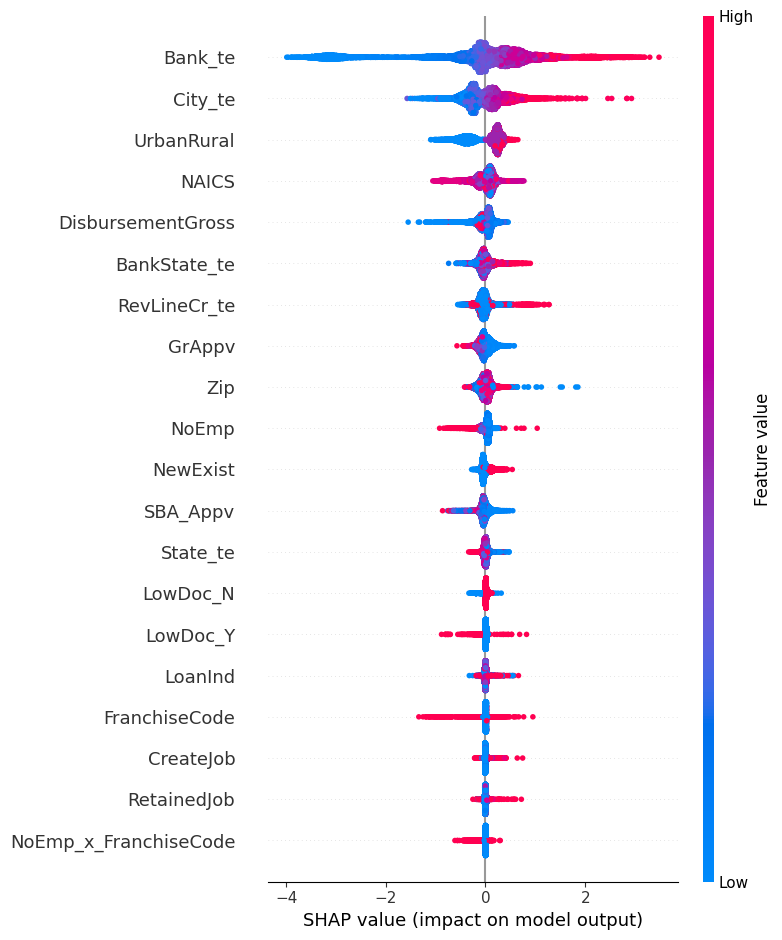

In [ ]:
examine_all_reason_codes(test_h2o, model)

The higher the SHAP value, the more important the feature is for the prediction of likelihood of loan repayment. In this case, the features 'bank_te', 'city_te', 'UrbanRural' & 'NAICS' code have the highest SHAP values. This means that these features are the most important for the model's prediction of whether a company would be able to pay off the loan in full.

In [ ]:
# The function is to calculate Shapley values (contributions) and plot them for single record
def examine_indiv_reason_codes(record, model, use_matplotlib=True):
    
    import shap
    shap_contribs = model.predict_contributions(record)
    
    col_mapping = {}
    for i in record.col_names: 
        related_cols = [x for x in shap_contribs.col_names if "{}.".format(i) in x]
        if len(related_cols) > 0:
            col_mapping[i] = related_cols
            
    for k, v in col_mapping.items():
        if len(v) > 1:
            shap_contribs[k] = shap_contribs[v].sum(axis=1,return_frame=True)
            shap_contribs = shap_contribs.drop(v)
        
    shap_cols = [i for i in shap_contribs.col_names if i != "BiasTerm"]
    bias_term = shap_contribs.as_data_frame()["BiasTerm"].values
    X = record.as_data_frame(use_pandas=True)
    shap_contribs = shap_contribs.as_data_frame(use_pandas=True)
    
    return shap.force_plot(bias_term, 
                           shap_contribs[shap_cols].values, 
                           X[shap_cols].values, 
                           shap_cols,
                           link="logit",
                           matplotlib=use_matplotlib
                          )

In [ ]:
# adding the absolute error term to the test dataset
hdf = h2o.H2OFrame(test)
predictions = model.predict(hdf)
predictions = predictions.as_data_frame()
test['pVal1'] = predictions['pVal1'].values
test['abs_error'] = abs(test['MIS_Status'] - test['pVal1'])

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
generic prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [ ]:
# sorting the test frame on absolute error
test_sorted = test.sort_values(by='abs_error') 
frame = h2o.H2OFrame(test_sorted)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# top 3 smallest residuals
import shap
shap.initjs()
examine_indiv_reason_codes(frame[0, :], model, use_matplotlib=False)

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


In [ ]:
shap.initjs()
examine_indiv_reason_codes(frame[1, :], model, use_matplotlib=False)

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


In [ ]:
shap.initjs()
examine_indiv_reason_codes(frame[2, :], model, use_matplotlib=False)

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


### Plotting shapley values for the top 3 smallest residual values

First plot: The Bank_te and City_te variables play a significant role in predicting the model's output i.e. the likelihood of loan repayment

Second plot: The Bank_te and NoEmp impact the most in increasing the likelihood of default for the given company record

Third plot: Here also Bank_te and NoEmp impact the most in increasing the likelihood of default for the given company record


In [ ]:
# top 3 largest residuals
shap.initjs()
examine_indiv_reason_codes(frame.tail(100)[10, :], model, use_matplotlib=False)

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


In [ ]:
shap.initjs()
examine_indiv_reason_codes(frame.tail(100)[20, :], model, use_matplotlib=False)

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


In [ ]:
shap.initjs()
examine_indiv_reason_codes(frame.tail(100)[60, :], model, use_matplotlib=False)

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


### Plotting shapley values for the top 3 largest residual values

First plot: The RevlineCr and UrbanRural variables play a significant role in incorrectly predicting the model's output i.e. the likelihood of loan repayment

Second plot: The Bank_te and City_te impact the most in incorrectly predicting the model's output

Third plot: Here also Bank_te and FranchiseCode impact the most in in incorrectly predicting the model's output